## Modelo 1: RandomForest Classifier

In [11]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt


### 1. Carga de los datos 

In [12]:
x=pd.read_csv("datos_entrada_normalizados.csv")
y=pd.read_csv("datos_salida.csv")

### 2. Entrenamiento de RandomForestClassifier con GridSearchCV

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [2, 4, 8],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

rf = RandomForestClassifier(random_state=42)
grid = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid.fit(x, y.values.ravel())

print("Mejores hiperparámetros:", grid.best_params_)
print("Mejor score de validación:", grid.best_score_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Mejores hiperparámetros: {'max_depth': 8, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
Mejor score de validación: 0.9580869565217391


### 3. Curvas de Aprendizaje del Mejor RandomForest

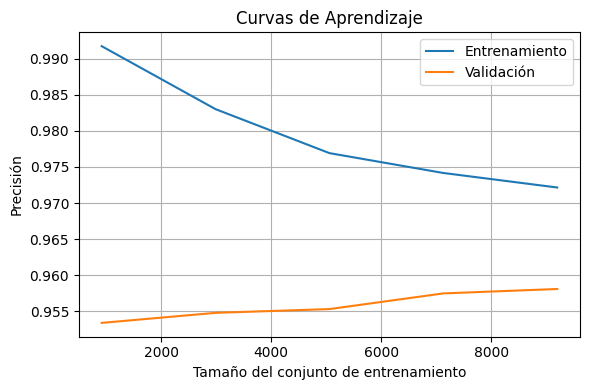

In [14]:
from sklearn.model_selection import learning_curve
import numpy as np

train_sizes, train_scores, test_scores = learning_curve(
    grid.best_estimator_, x, y.values.ravel(), cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 5)
)
train_scores_mean = train_scores.mean(axis=1)
test_scores_mean = test_scores.mean(axis=1)

plt.figure(figsize=(6, 4))
plt.plot(train_sizes, train_scores_mean, label="Entrenamiento")
plt.plot(train_sizes, test_scores_mean, label="Validación")
plt.title("Curvas de Aprendizaje")
plt.xlabel("Tamaño del conjunto de entrenamiento")
plt.ylabel("Precisión")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### 4. Matriz de Confusión del Mejor RandomForest

Matriz de confusión:
 [[9191    9]
 [ 329 1971]]

Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      9200
           1       1.00      0.86      0.92      2300

    accuracy                           0.97     11500
   macro avg       0.98      0.93      0.95     11500
weighted avg       0.97      0.97      0.97     11500


Precisión total: 0.9706086956521739


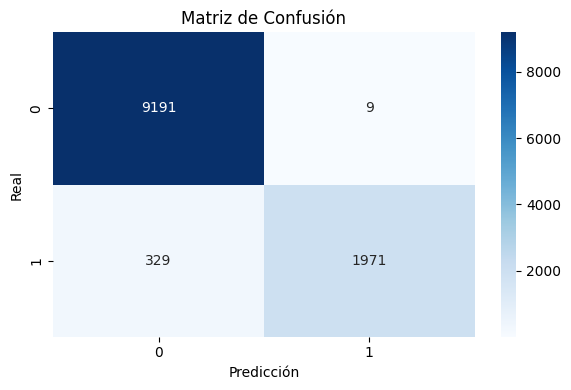

In [15]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns

y_pred = grid.best_estimator_.predict(x)
cm = confusion_matrix(y, y_pred)
print("Matriz de confusión:\n", cm)
print("\nReporte de clasificación:\n", classification_report(y, y_pred))
print("\nPrecisión total:", accuracy_score(y, y_pred))

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Matriz de Confusión")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.tight_layout()
plt.show()

### 5. Curva ROC

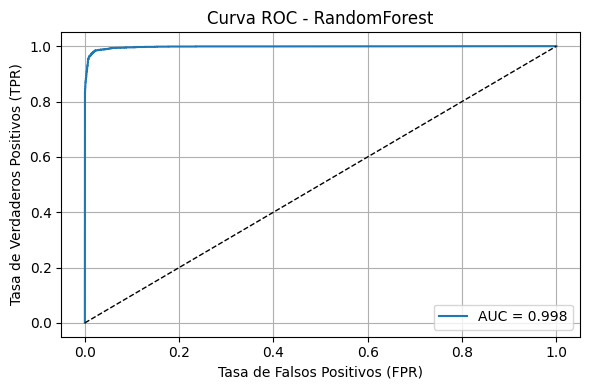

In [16]:
from sklearn.metrics import roc_curve, auc

# Obtener las probabilidades de predicción para la clase positiva
y_proba = grid.best_estimator_.predict_proba(x)[:, 1]

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.3f}')
plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC - RandomForest')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

### 6. Exportar metricas importantes

In [17]:
import json

resultados_modelo_1 = {
    "modelo": "RandomForestClassifier",
    "mejores_hiperparametros": grid.best_params_,
    "mejor_score_validacion": grid.best_score_,
    "precision_total": accuracy_score(y, y_pred),
    "matriz_confusion": cm.tolist(),
    "reporte_clasificacion": classification_report(y, y_pred, output_dict=True),
}

try:
    with open("resultados_modelos.json", "r") as fr:
        datos_existentes = json.load(fr)
except (FileNotFoundError, json.JSONDecodeError):
    datos_existentes = []

datos_existentes.append(resultados_modelo_1)

with open("resultados_modelos.json", "w") as f:
    json.dump(datos_existentes, f, indent=4)